In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

import matplotlib.ticker as plticker
from matplotlib import cm

import numpy as np

from matplotlib.gridspec import GridSpec
#import matplotlib.ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator,LogLocator,NullFormatter)


In [ ]:
#change the paths to your folder structure


#plt.style.use('plot_style.txt')
plt.style.use('/data/user/boiger_r/aerosol/aerosol_code1/postprocessing/PLOTS_PAPER/plot_style.txt')

#test_datafile = 'test_dataset.hdf5'
test_datafile = '/data/user/boiger_r/aerosol/aerosol_data/raw_data_AAE/pre_log_ts-0.2_wl-450-532-630_sc-None_qoi-ScatteringData/test_dataset.hdf5'


directory = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
directory1 = directory + 'paper_results_gaussian_AAE/version1'

#directory1="plots"

#pred_datafile ='pred.hdf5'
pred_datafile = directory1 +'/model/pred.hdf5'



In [ ]:
# Plot styling
#os.environ["PATH"] += os.pathsep + '/usr/bin' # To set latex= True?


# Textwidth of LaTeX file. Can be determined via \the\textwidth
textwidth = 483.69687

# Decide wether we want to save all figures
save_to_file = True

# Colors
cmap = cm.get_cmap('magma')

# Ticks
loc15 = plticker.MultipleLocator(base=15.0)
loc30 = plticker.MultipleLocator(base=30.0)

In [ ]:
plot_dir = directory1 + '/plots/hyperparameter_scans_paper'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
result_dir = directory1
model_dir = directory1 +'/model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [ ]:
def set_size(textwidth, fraction=1, subplots=(1, 1), scale_factor=1, rescale_height=1):
    """Set figure dimensions to avoid scaling in LaTeX.
    
    Based largely on Jack Walton's post on ploting figures with matplotlib and LaTeX:
    https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    
    Input:
        textwidth: float or string
                Document width in points, or string of predined document type
        fraction: float, optional
                Fraction of the width which you wish the figure to occupy
        subplots: array-like, optional
                The number of rows and columns of subplots.
        scale_factor: Facto to scale width and height with
        rescale_height: Factor to rescale height
    Returns:
        fig_dim: tuple
                Dimensions of figure in inches
    """
    if textwidth == 'paper':
        # Textwidth of LaTeX file. Can be determined by typing
        # \the\textwidth
        # in your latex file and then compiling.
        width_pt = 483.69687
    elif textwidth == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = textwidth

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (scale_factor*fig_width_in, rescale_height*scale_factor*fig_height_in)

In [ ]:
#color = [cmap(0.8), cmap(0.2)]
#color = ['tab:blue', 'tab:red']
#scat_style = {'s': 12, 'marker': 'P', 'alpha': 0.9, 'linewidths': 0.8}

#train_marker = {'markerfacecolor': color[0], 'markeredgecolor': color[0], 'color': color[0],
#                'markersize': 4, 'alpha': 1}
#val_marker = {'markerfacecolor': color[1], 'markeredgecolor': color[1], 'color': color[1],
#               'markersize': 3, 'alpha': 1}

In [ ]:
dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
qoi_test = pd.read_hdf(test_datafile,key = 'qoi')
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

In [ ]:
qoi_pred_fw = pd.read_hdf(pred_datafile, 'fw')
qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_test.columns)
qoi_pred_fw

In [ ]:
dvar_pred_iv = pd.read_hdf(pred_datafile,'inv')
dvar_pred_iv = pd.DataFrame(data=dvar_pred_iv, columns=dvar_test.columns)
dvar_pred_iv

In [10]:
qoi_columns = qoi_test.columns
dvar_columns = dvar_test.columns

In [11]:
wl = ['450', '532','630']
wl_P11_450 = []
wl_P11_532 = []
wl_P11_630 = []
wl_P12_450 = []
wl_P12_532 = []
wl_P12_630 = []
for key in qoi_test.columns:
    if 'P11_0.450' in key:
        wl_P11_450.append(key)
    elif 'P11_0.532' in key:
        wl_P11_532.append(key)
    elif 'P11_0.630' in key:
        wl_P11_630.append(key)
    elif 'P12_0.450' in key:
        wl_P12_450.append(key)
    elif 'P12_0.532' in key:
        wl_P12_532.append(key)
    elif 'P12_0.630' in key:
        wl_P12_630.append(key)
wl_list_P11 = [wl_P11_450,wl_P11_532,wl_P11_630]
wl_list_P12 = [wl_P12_450, wl_P12_532, wl_P12_630]        

In [12]:
#color1 = ['orange','red','darkred','dodgerblue','blue','midnightblue']

In [13]:
#pred_marker450 = {'marker':'.','markersize':6,'markerfacecolor': color1[0], 'markeredgecolor': color1[0], 'color': color1[0],
#             'alpha': 0.9}
#test_marker450 = {'linewidth':5,'color': color1[3],'alpha': 0.9}
#pred_marker532 = {'marker':'.','markersize':6,'markerfacecolor': color1[1], 'markeredgecolor': color1[1], 'color': color1[1],
#             'alpha': 0.9}
#test_marker532 = {'linewidth':5,'color': color1[4], 'alpha': 0.9}
#pred_marker630 = {'marker':'.','markersize':6,'markerfacecolor': color1[2], 'markeredgecolor': color1[2], 'color': color1[2],
#             'alpha': 0.9}
#test_marker630 = {'linewidth':5,'color': color1[5], 'alpha': 0.9}

In [14]:

presentation_plot_index = [4000,1000,6000,3000,2000,5000]

In [15]:
dvar_pred_iv['k_450']=dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
dvar_pred_iv['k_630']=dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])
dvar_test['k_450']=dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
dvar_test['k_630']=dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])

In [16]:
x_450 = 450*np.ones(len(presentation_plot_index))
x_532 = 532*np.ones(len(presentation_plot_index))
x_630 = 630*np.ones(len(presentation_plot_index))


In [17]:
#color1 = ['gold','orange','orangered','red','firebrick','darkred']

#color2 = ['skyblue','dodgerblue','royalblue', 'blue', 'darkblue','midnightblue']
color1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red','tab:purple', 'tab:cyan']


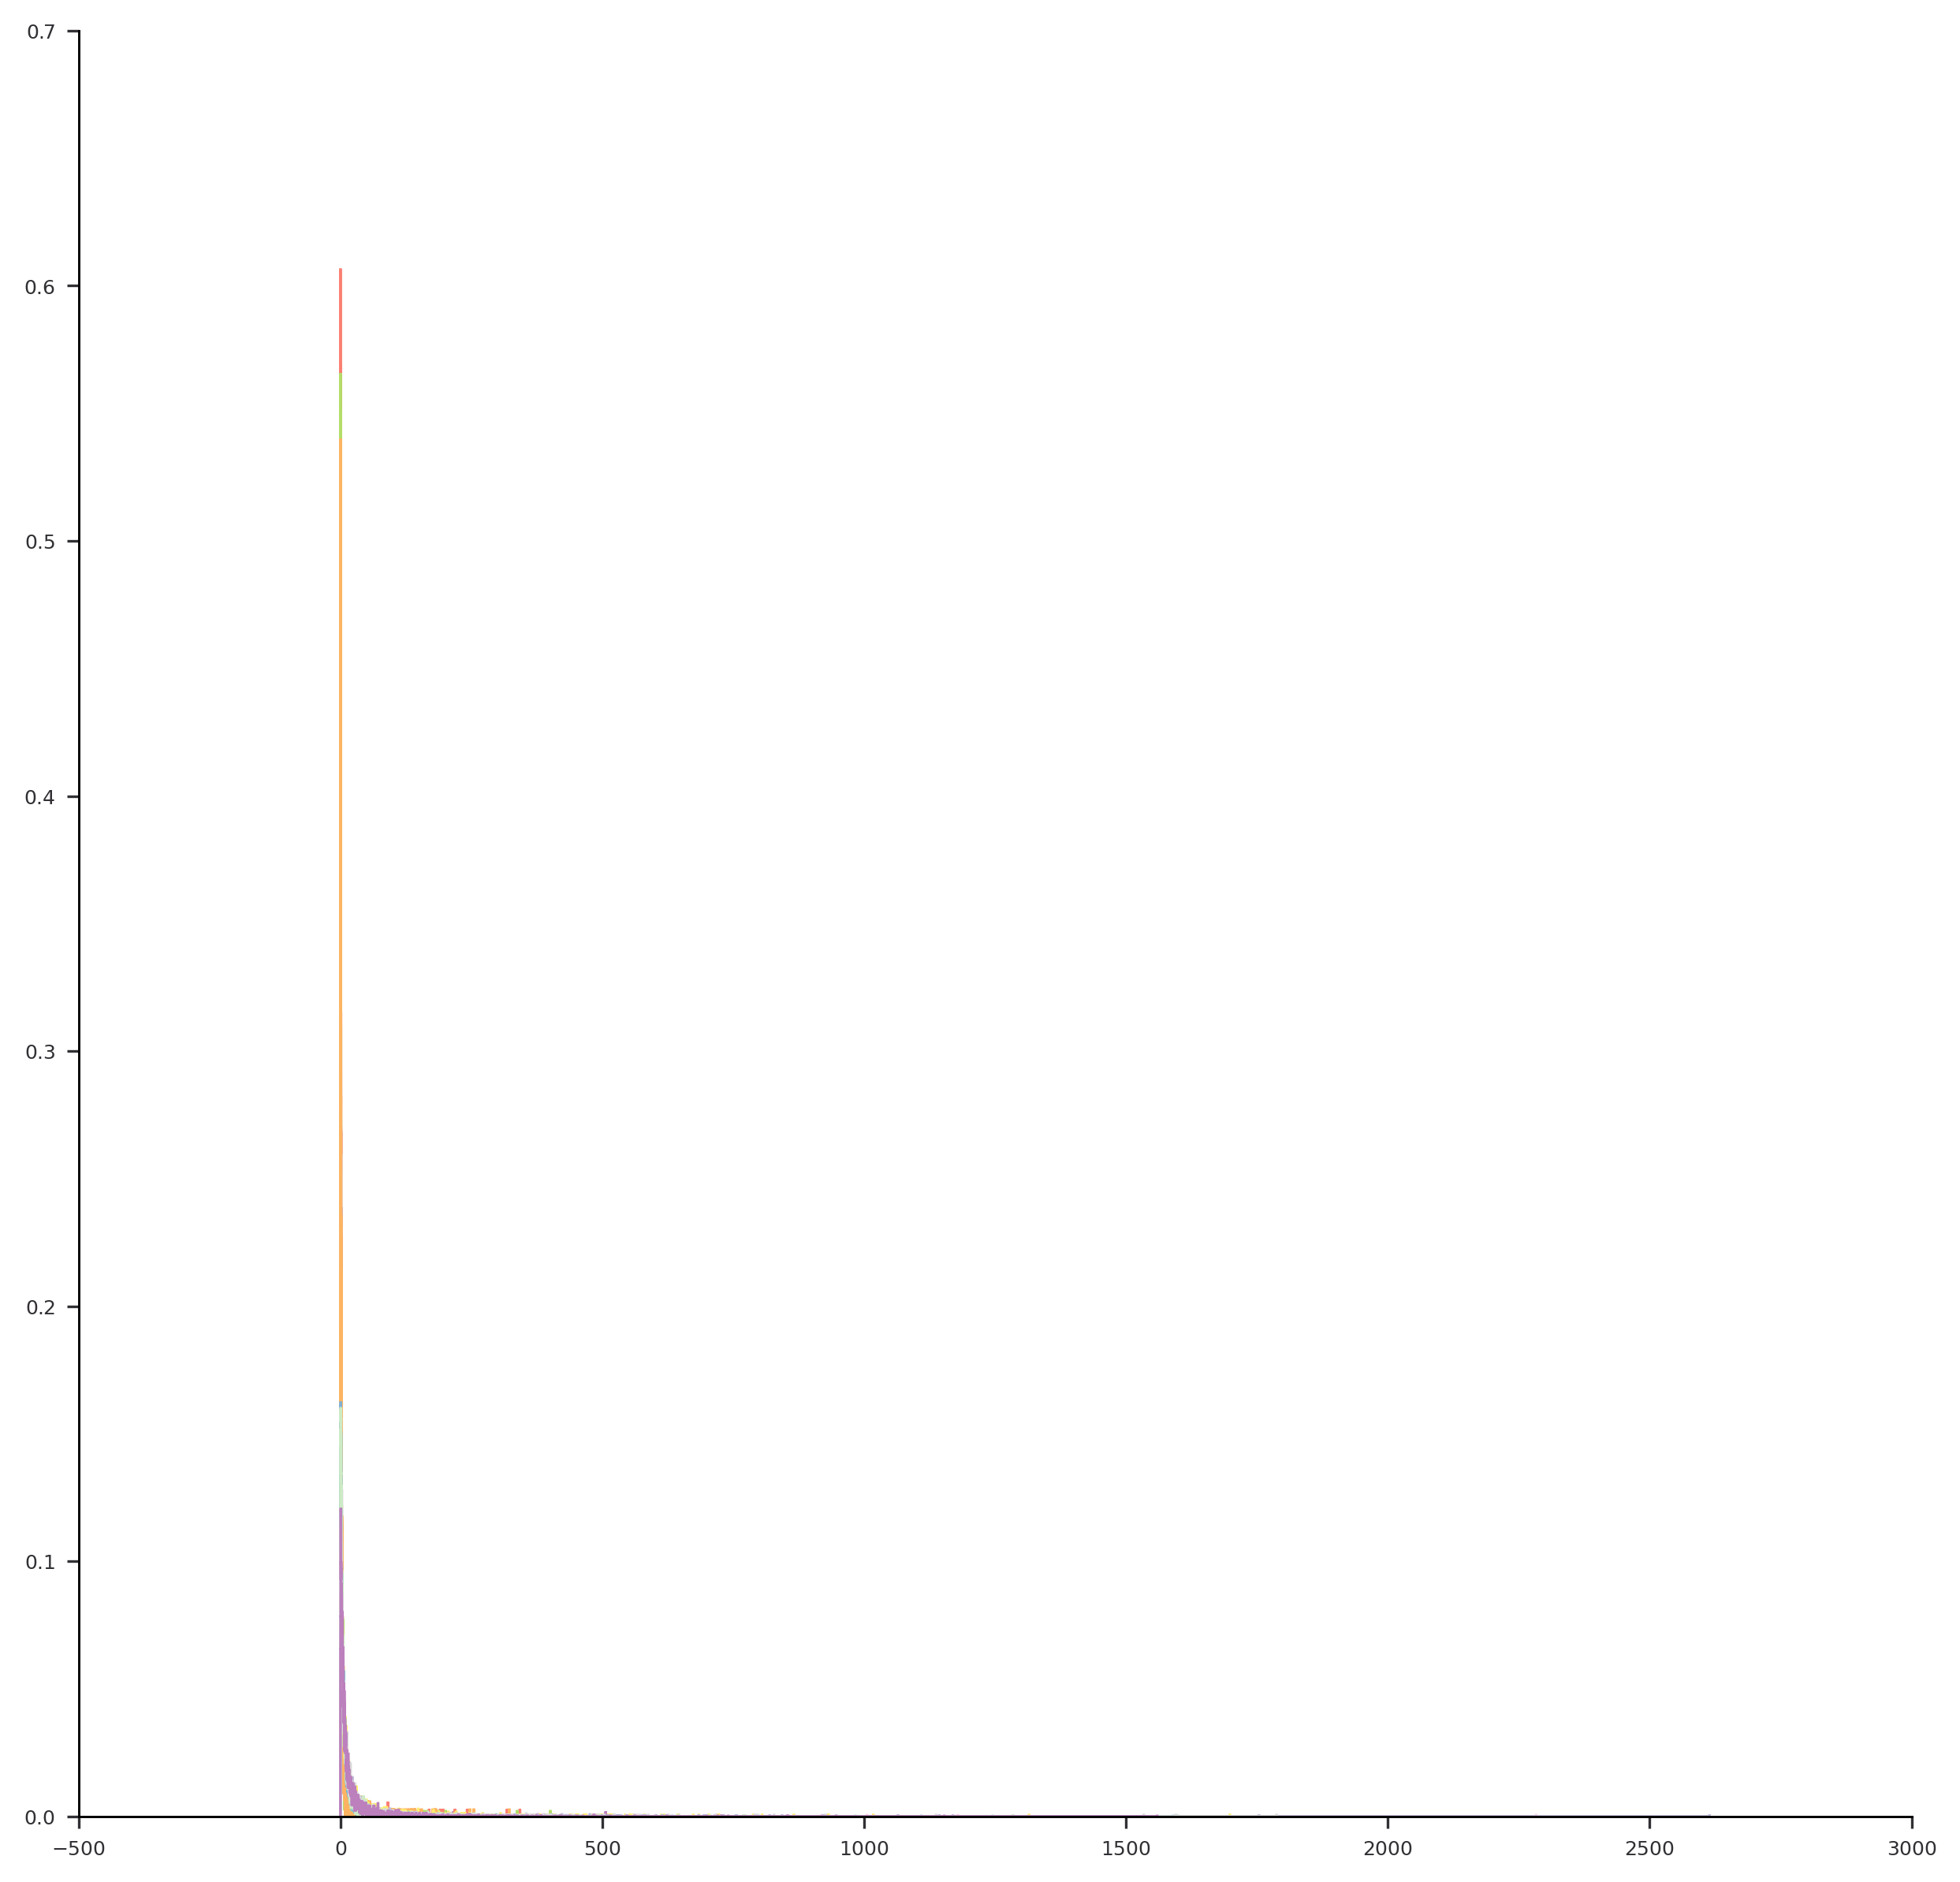

In [18]:
fig, ax = plt.subplots(figsize = (10,10))

x1data = []
x2data = []
y1data = []
y2data = []

for datapoint in presentation_plot_index:
    mu1 = dvar_pred_iv.iloc[datapoint]['R_median']
    sigma1 = dvar_pred_iv.iloc[datapoint]['GSD']
    mu2 = dvar_test.iloc[datapoint]['R_median']
    sigma2 = dvar_test.iloc[datapoint]['GSD']
    Vtot1 = dvar_pred_iv.iloc[datapoint]['V_tot']
    Vtot2 = dvar_test.iloc[datapoint]['V_tot']
    
    
    s1 = np.random.lognormal(mu1, sigma1, 10000)
    s2 = np.random.lognormal(mu2, sigma2, 10000)


    count1, bins1, ignored1 = plt.hist(s1, 10000, density=True, align='mid',histtype = 'step')
    count2, bins2, ignored2 = plt.hist(s2, 10000, density=True, align='mid',histtype = 'step')

    x1 = np.linspace(min(bins1), max(bins1), 100000)
    x2 = np.linspace(min(bins2), max(bins2), 100000)

    pdf1 = Vtot1*(np.exp(-(np.log(x1) - np.log(mu1))**2 / (2 * sigma1**2)) / (x1 * sigma1 * np.sqrt(2 * np.pi)))
    pdf2 = Vtot2*(np.exp(-(np.log(x2) - np.log(mu2))**2 / (2 * sigma2**2)) / (x2 * sigma2 * np.sqrt(2 * np.pi)))

    x1data.append(x1)
    x2data.append(x2)
    y1data.append(pdf1)
    y2data.append(pdf2)


(0.0, 0.22)

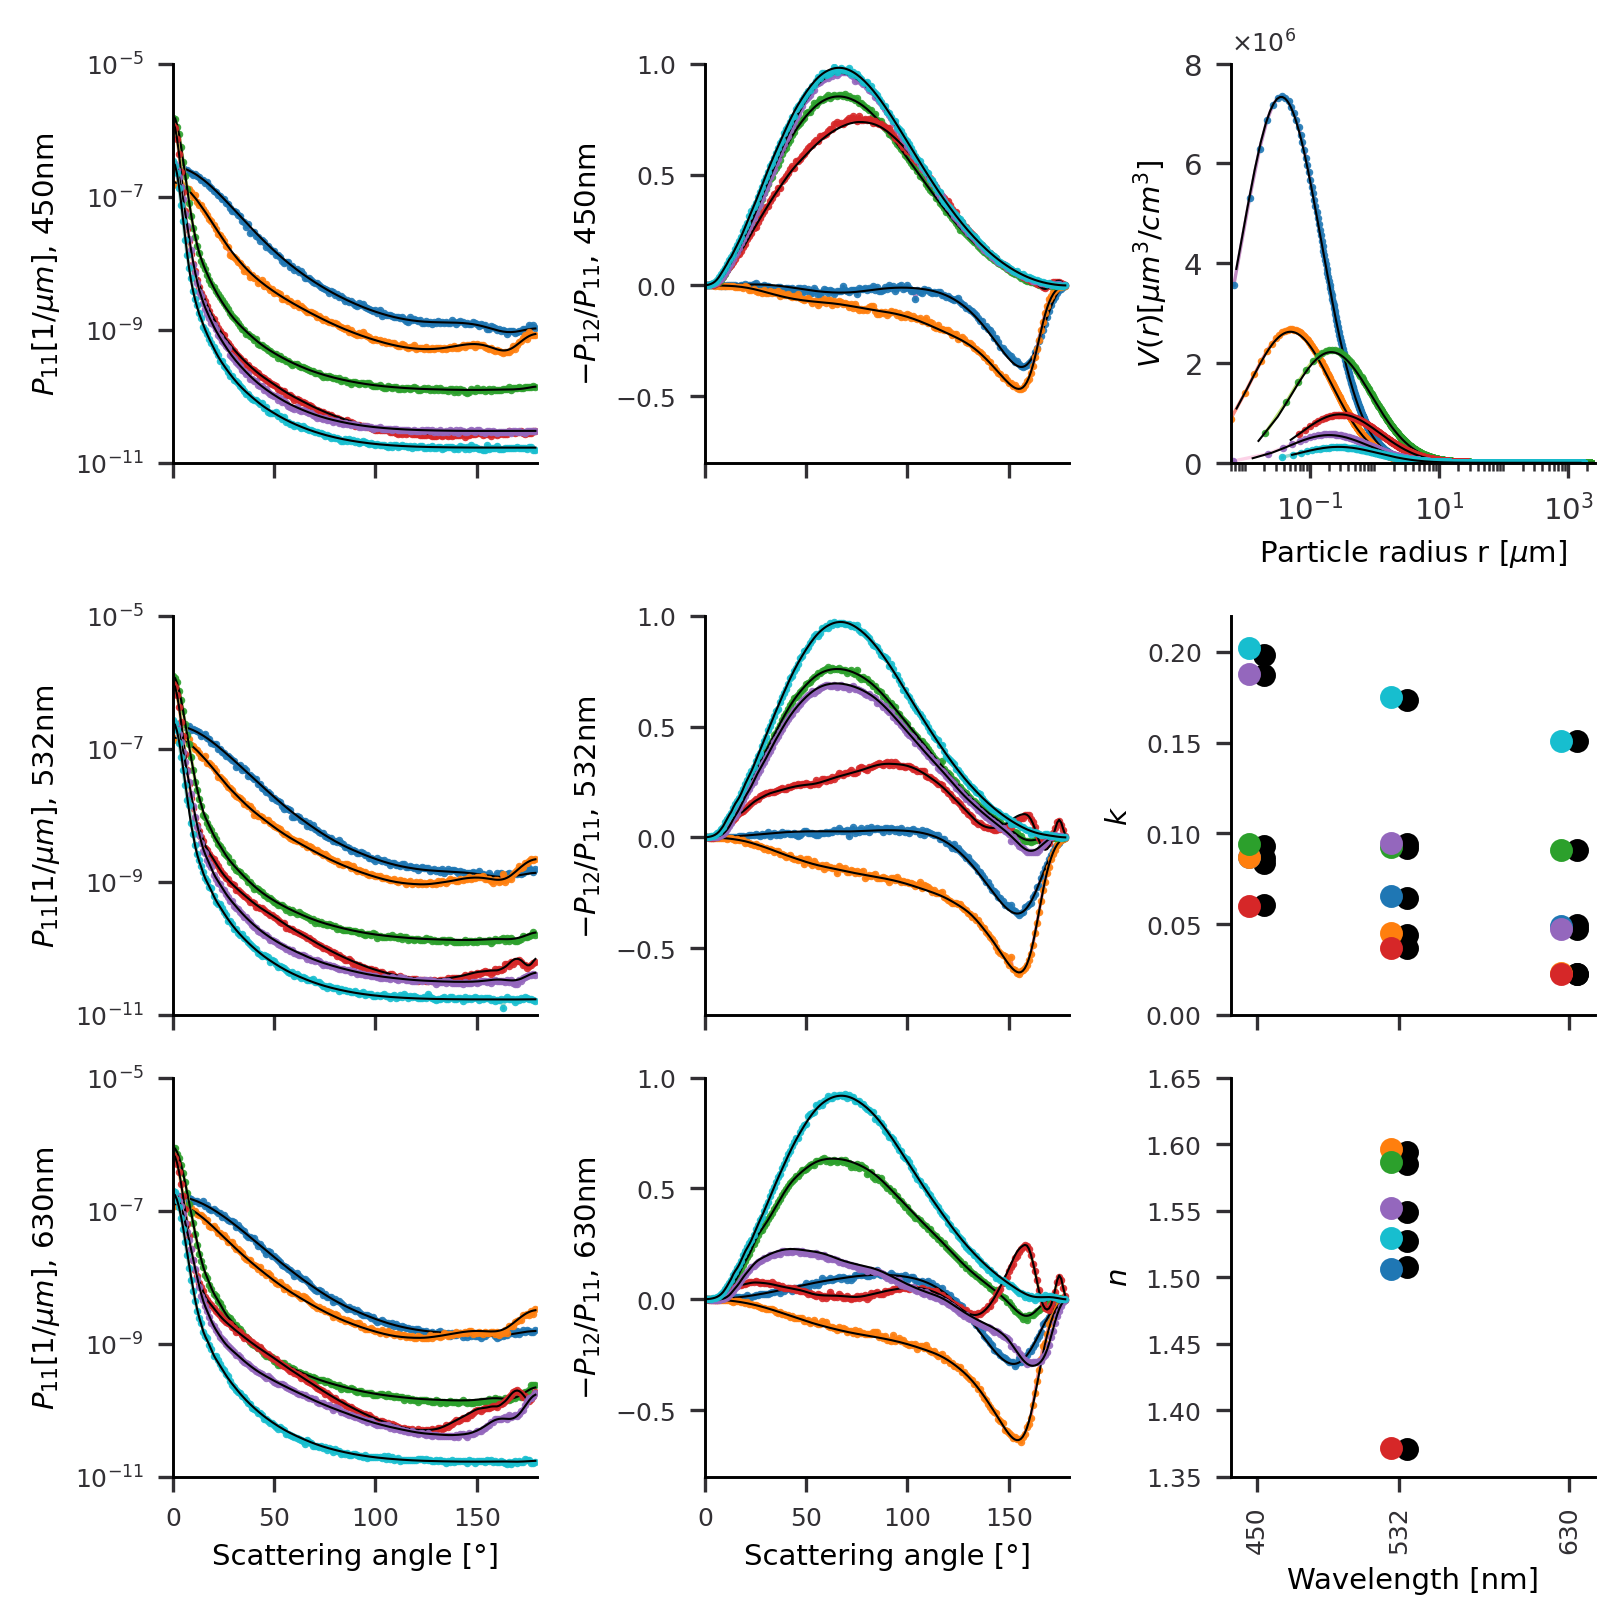

In [19]:
fig = plt.figure(figsize=(5.3,5.3),constrained_layout=True)

gs = GridSpec(3, 3, figure=fig)

ax2 = fig.add_subplot(gs[0, 0])
ax4 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 0],sharex=ax2)
ax8 = fig.add_subplot(gs[1, 1],sharex=ax4)
ax10 = fig.add_subplot(gs[2, 0],sharex=ax2)
ax12 = fig.add_subplot(gs[2, 1],sharex=ax4)
ax13 = fig.add_subplot(gs[0,2])
ax14 = fig.add_subplot(gs[1,2])
ax15 = fig.add_subplot(gs[2,2],sharex=ax14)
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
        
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)      
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)

    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11} [1 / \mu m]$, 450nm')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11} [1 / \mu m]$, 532nm')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11} [1 / \mu m]$, 630nm')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$, 450nm')
ax8.set_ylabel('$-P_{12}/P_{11}$, 532nm ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$, 630nm')
ax12.set_xlim(0, 180)    
ax2.set_ylim(bottom = 10**(-11))
ax6.set_ylim(bottom = 10**(-11))
ax10.set_ylim(bottom = 10**(-11))

ax4.set_ylim(-0.8,1)
ax8.set_ylim(-0.8,1)
ax12.set_ylim(-0.8,1)

i=0
for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532)
    ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)

    i=i+1
    ax13.set_xscale('log')
    ax13.set_xlabel('Particle radius r [$\mu$m]',fontsize = 7)
    ax13.set_ylabel('$V(r) [\mu m^3/cm^3] $' ,fontsize = 7)
    ax13.tick_params(labelsize = 7)    
    #ax13.xaxis.set_minor_locator(AutoMinorLocator())
    x_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    ax13.xaxis.set_minor_locator(x_minor)
    ax13.xaxis.set_minor_formatter(NullFormatter())

    ax13.set_ylim(bottom=0)
    ax13.set_xlim(left = np.min(x1data), right = np.max(x2data))
    
    
df_new = dvar_test.iloc[presentation_plot_index].round(2)
df_new_columns = ["$V_{tot}$","$R_{mean}$","$\sigma_g$","$n$","$k_{532}$","AAE"]
df_new_index = ['1000','2000','3000','4000','5000','6000']

ax14.plot(x_450+4.5,dvar_test['k_450'].iloc[presentation_plot_index],'ko', markersize = 4.5)
ax14.plot(x_532+4.5,dvar_test['k_532'].iloc[presentation_plot_index],'ko', markersize = 4.5)
ax14.plot(x_630+4.5,dvar_test['k_630'].iloc[presentation_plot_index],'ko', markersize = 4.5)

ax15.plot(x_532+4.5,dvar_test['n'].iloc[presentation_plot_index],'ko', markersize = 4.5)

for i in range(len(presentation_plot_index)):
    ax14.plot(x_450[i]-4.5,dvar_pred_iv['k_450'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i], markersize =4.5)
    ax14.plot(x_532[i]-4.5,dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)
    ax14.plot(x_630[i]-4.5,dvar_pred_iv['k_630'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)
    ax15.plot(x_532[i]-4.5,dvar_pred_iv['n'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i], markersize = 4.5)

xlabel = [450,532,630]
ax15.set_xticks(xlabel)
ax15.set_xticklabels(xlabel, rotation='vertical')
ax14.set_xticks(xlabel)

plt.setp(ax14.get_xticklabels(), visible=False)

ax15.set_xlabel('Wavelength [nm]')
ax14.set_ylabel('$k$')
ax15.set_ylabel('$n$')
ax14.set_xlim(435,645)
ax15.set_xlim(435,645)

ax14.set_ylim(top = 0.22)

#fig.tight_layout() 
#fig.savefig(f'{plot_dir}/Test_Pred_V_refrac.jpg',bbox_inches='tight')

(0.0, 0.22)

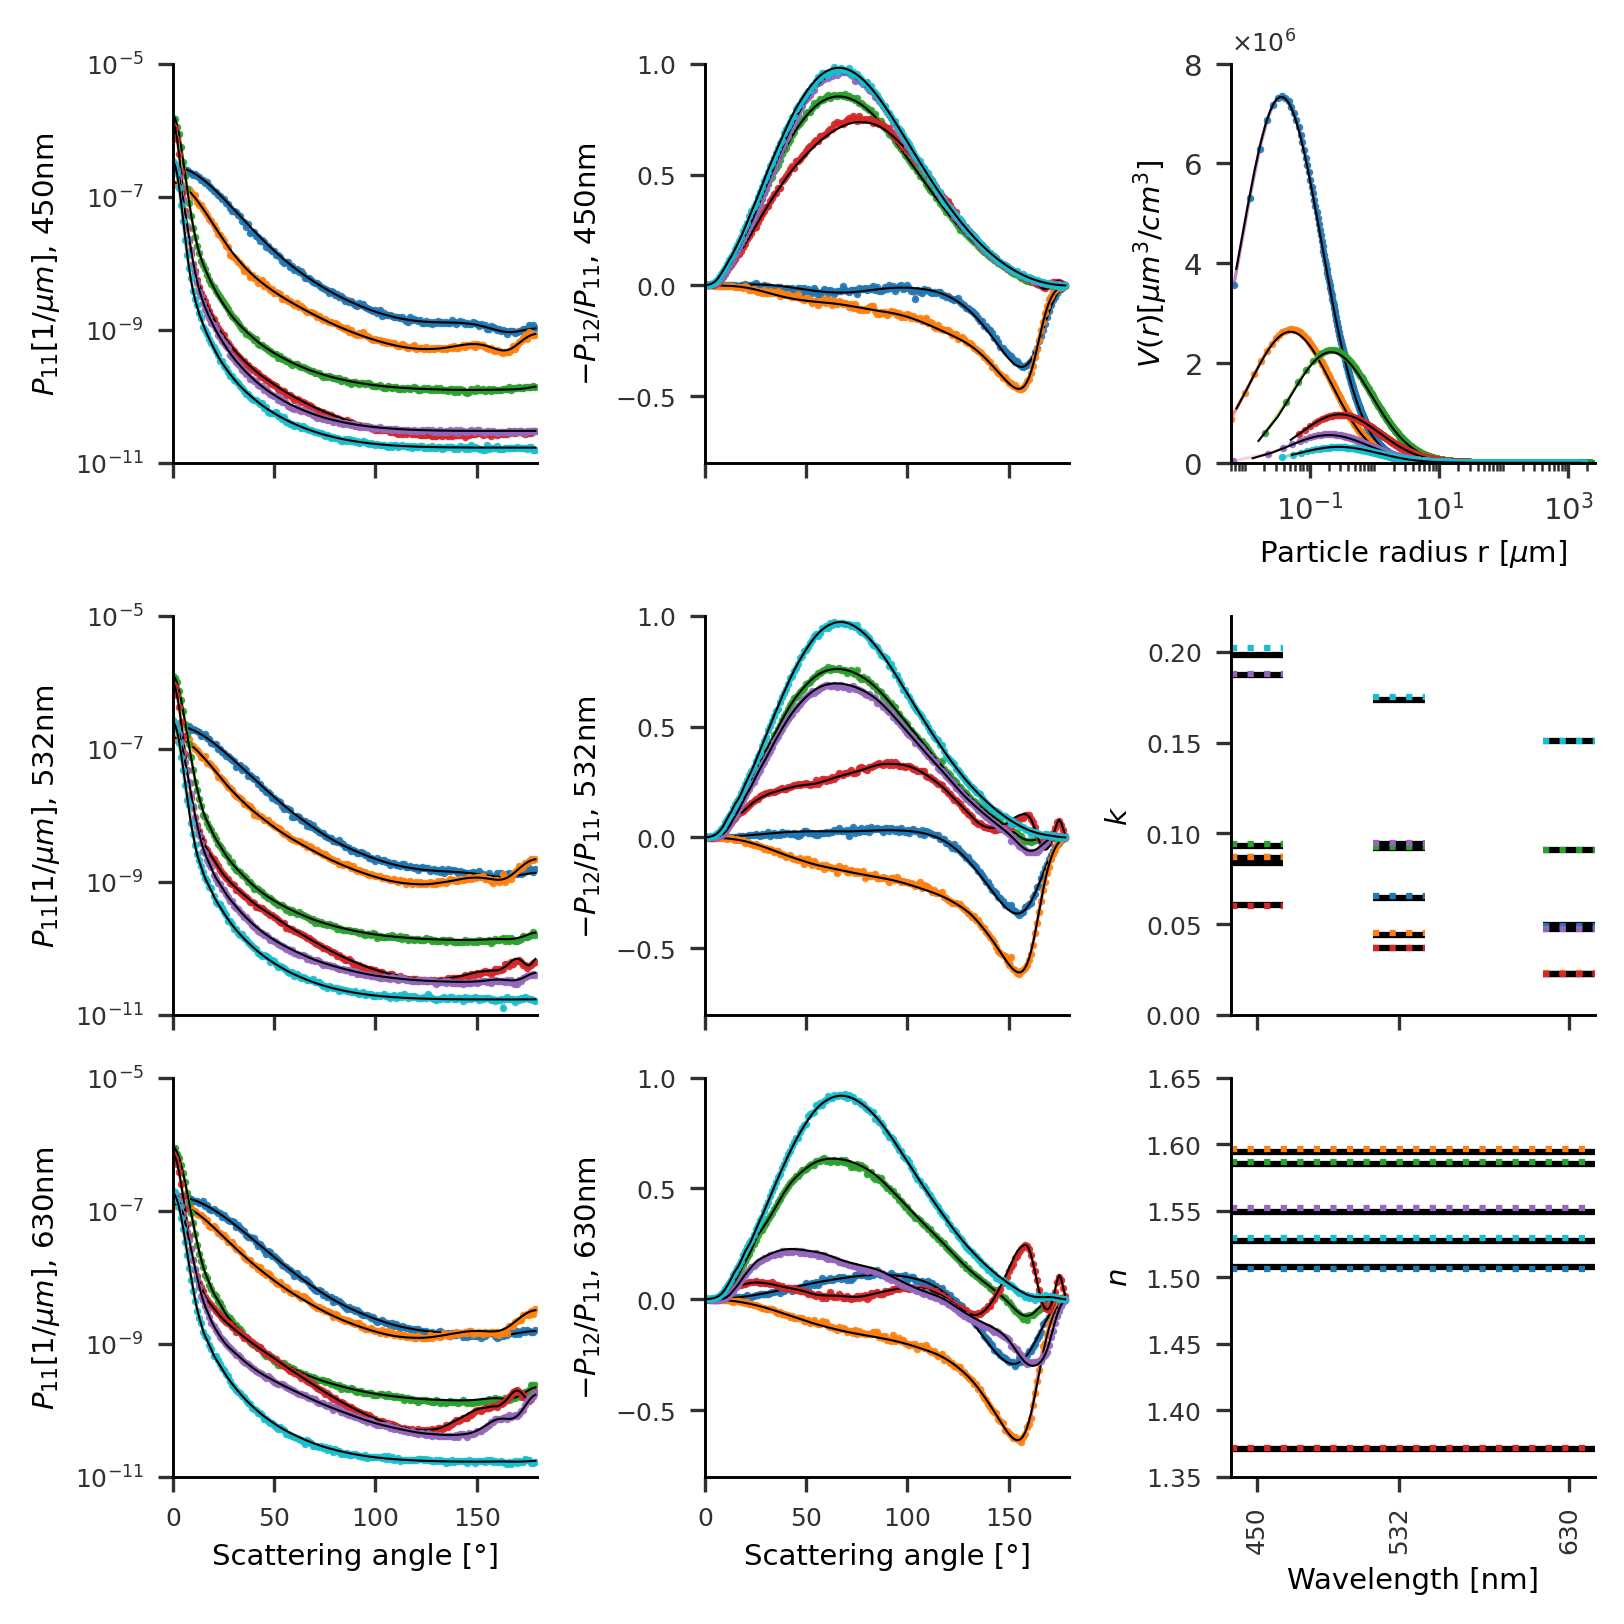

In [20]:
fig = plt.figure(figsize=(5.3,5.3),constrained_layout=True)

gs = GridSpec(3, 3, figure=fig)

ax2 = fig.add_subplot(gs[0, 0])
ax4 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 0],sharex=ax2)
ax8 = fig.add_subplot(gs[1, 1],sharex=ax4)
ax10 = fig.add_subplot(gs[2, 0],sharex=ax2)
ax12 = fig.add_subplot(gs[2, 1],sharex=ax4)
ax13 = fig.add_subplot(gs[0,2])
ax14 = fig.add_subplot(gs[1,2])
ax15 = fig.add_subplot(gs[2,2],sharex=ax14)
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)

    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11} [1 / \mu m]$, 450nm')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11} [1 / \mu m]$, 532nm')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11} [1 / \mu m]$, 630nm')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$, 450nm')
ax8.set_ylabel('$-P_{12}/P_{11}$, 532nm ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$, 630nm')
ax12.set_xlim(0, 180)    
ax2.set_ylim(bottom = 10**(-11))
ax6.set_ylim(bottom = 10**(-11))
ax10.set_ylim(bottom = 10**(-11))
ax4.set_ylim(-0.8,1)
ax8.set_ylim(-0.8,1)
ax12.set_ylim(-0.8,1)

i=0
for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532)
    ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)

    i=i+1
    ax13.set_xscale('log')
    ax13.set_xlabel('Particle radius r [$\mu$m]',fontsize = 7)
    ax13.set_ylabel('$V(r) [\mu m^3/cm^3] $' ,fontsize = 7)
    ax13.tick_params(labelsize = 7)    
    #ax13.xaxis.set_minor_locator(AutoMinorLocator())
    x_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    ax13.xaxis.set_minor_locator(x_minor)
    ax13.xaxis.set_minor_formatter(NullFormatter())

    ax13.set_ylim(bottom=0)
    ax13.set_xlim(left = np.min(x1data), right = np.max(x2data))
    
    
df_new = dvar_test.iloc[presentation_plot_index].round(2)
df_new_columns = ["$V_{tot}$","$R_{mean}$","$\sigma_g$","$n$","$k_{532}$","AAE"]
df_new_index = ['1000','2000','3000','4000','5000','6000']

ax15.hlines(dvar_test['n'].iloc[presentation_plot_index], 435, 645, colors='k', linestyles='solid',linewidth = 1.5)
ax14.hlines(dvar_test['k_450'].iloc[presentation_plot_index], 435, 465, colors='k', linestyles='solid',linewidth = 1.5)
ax14.hlines(dvar_test['k_532'].iloc[presentation_plot_index], 517, 547, colors='k', linestyles='solid',linewidth = 1.5)
ax14.hlines(dvar_test['k_630'].iloc[presentation_plot_index], 615, 645, colors='k', linestyles='solid',linewidth = 1.5)

for i in range(len(presentation_plot_index)):
    ax15.hlines(dvar_pred_iv['n'].iloc[presentation_plot_index[i]], 435, 645, colors=color1[i], linestyles='dotted', linewidth = 1.5)
    ax14.hlines(dvar_pred_iv['k_450'].iloc[presentation_plot_index[i]], 435, 465, colors=color1[i], linestyles='dotted', linewidth = 1.5)
    ax14.hlines(dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]], 517, 547, colors=color1[i], linestyles='dotted', linewidth = 1.5)
    ax14.hlines(dvar_pred_iv['k_630'].iloc[presentation_plot_index[i]], 615, 645, colors=color1[i], linestyles='dotted', linewidth = 1.5)

xlabel = [450,532,630]
ax15.set_xticks(xlabel)
ax15.set_xticklabels(xlabel, rotation='vertical')
ax14.set_xticks(xlabel)

plt.setp(ax14.get_xticklabels(), visible=False)

ax15.set_xlabel('Wavelength [nm]')
ax14.set_ylabel('$k$')
ax15.set_ylabel('$n$')
ax14.set_xlim(435,645)
ax15.set_xlim(435,645)

ax14.set_ylim(top = 0.22)

#fig.tight_layout() 
#fig.savefig(f'{plot_dir}/Test_Pred_V_refrac.jpg',bbox_inches='tight')

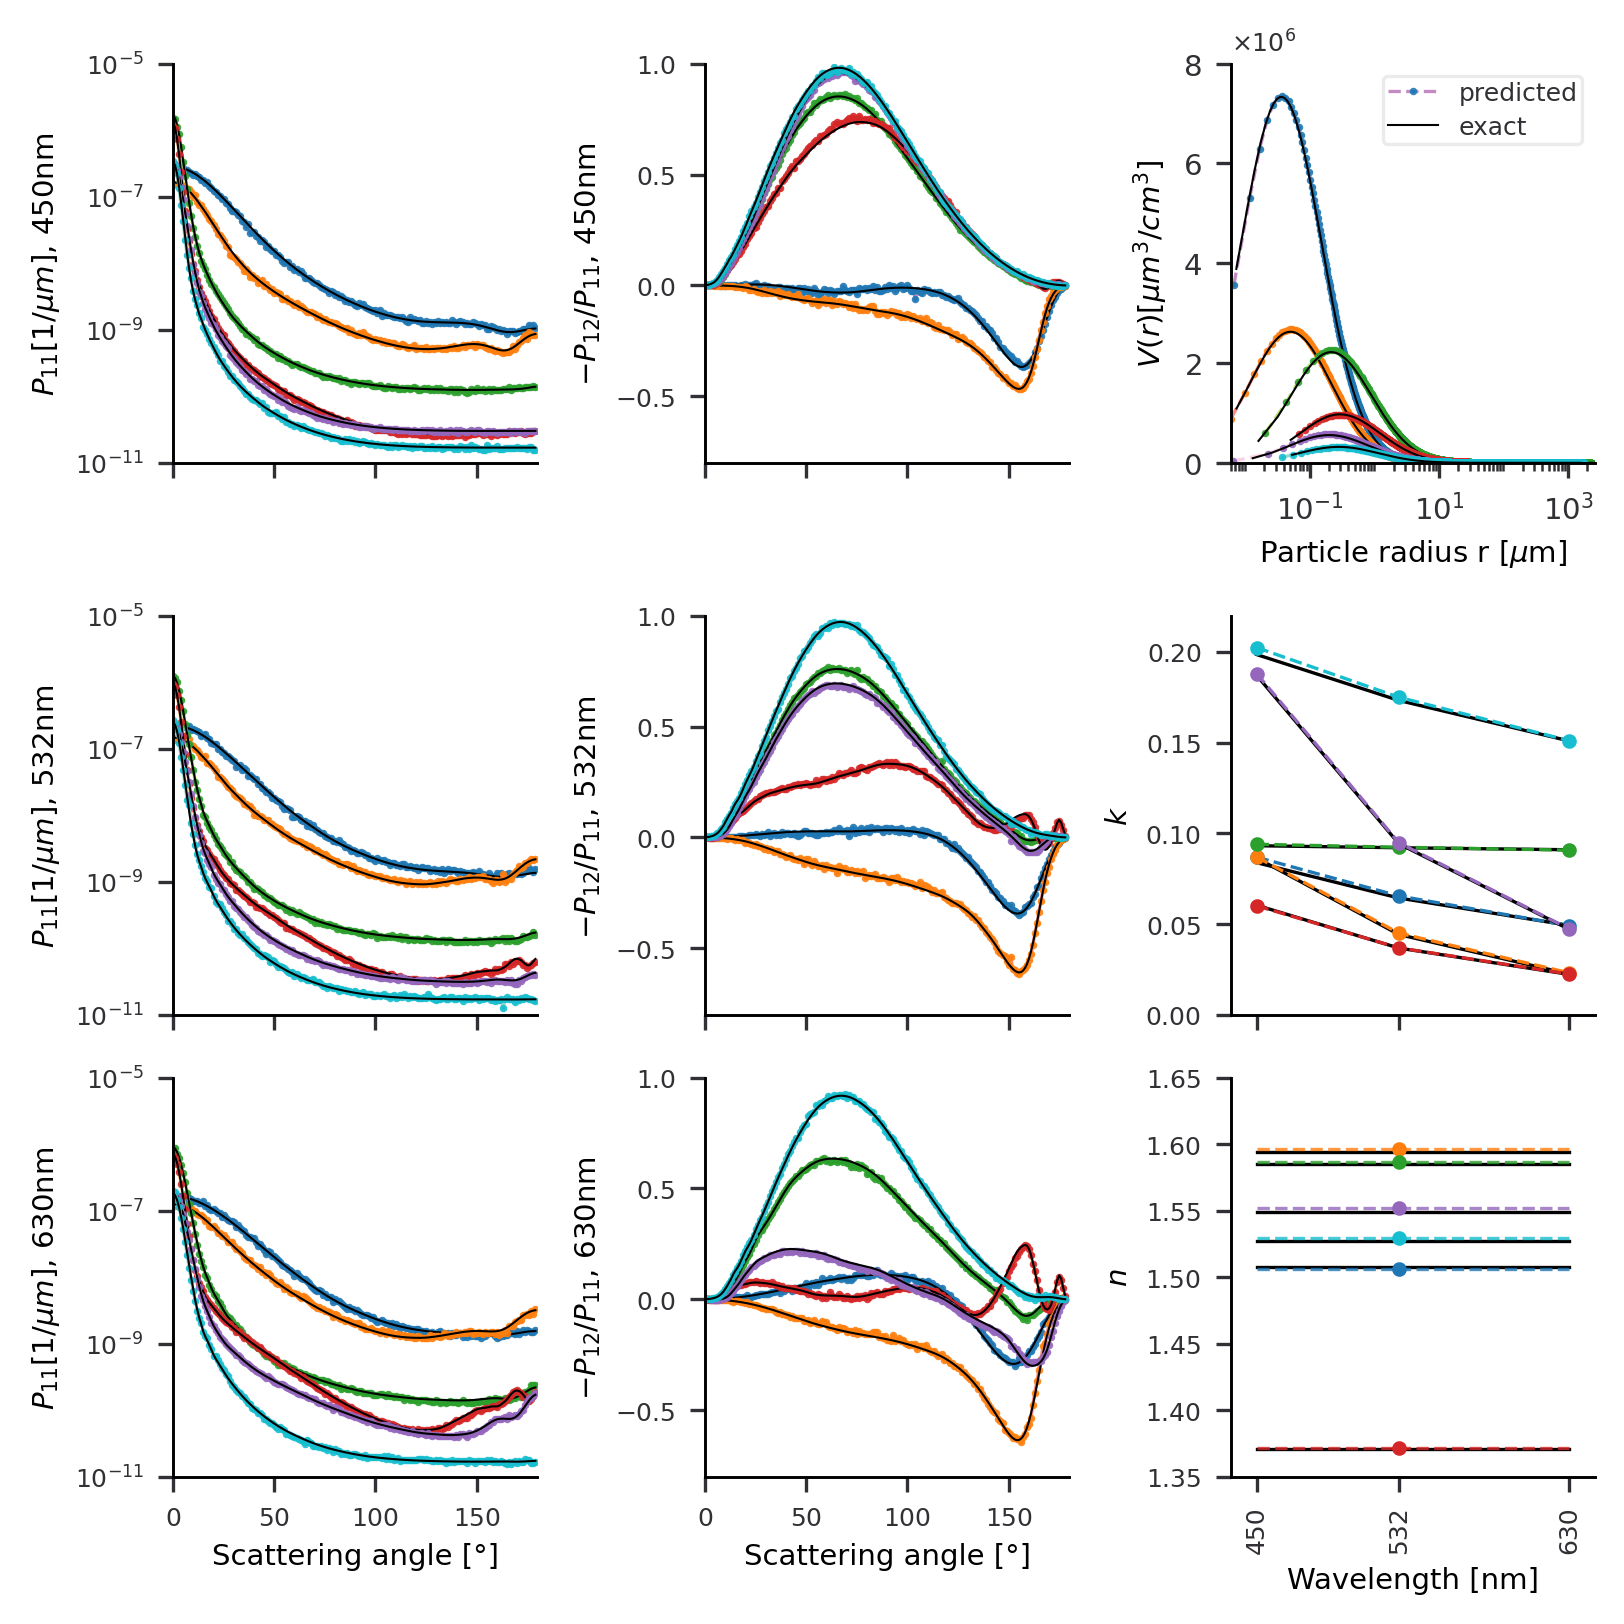

In [21]:
fig = plt.figure(figsize=(5.3,5.3),constrained_layout=True)

gs = GridSpec(3, 3, figure=fig)
ax2 = fig.add_subplot(gs[0, 0])
ax4 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 0],sharex=ax2)
ax8 = fig.add_subplot(gs[1, 1],sharex=ax4)
ax10 = fig.add_subplot(gs[2, 0],sharex=ax2)
ax12 = fig.add_subplot(gs[2, 1],sharex=ax4)
ax13 = fig.add_subplot(gs[0,2])
ax14 = fig.add_subplot(gs[1,2])
ax15 = fig.add_subplot(gs[2,2],sharex=ax14)
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11} [1 / \mu m]$, 450nm')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11} [1 / \mu m]$, 532nm')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11} [1 / \mu m]$, 630nm')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$, 450nm')
ax8.set_ylabel('$-P_{12}/P_{11}$, 532nm ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$, 630nm')
ax12.set_xlim(0, 180)    

ax2.set_ylim(bottom = 10**(-11))
ax6.set_ylim(bottom = 10**(-11))
ax10.set_ylim(bottom = 10**(-11))

ax4.set_ylim(-0.8,1)
ax8.set_ylim(-0.8,1)
ax12.set_ylim(-0.8,1)

i=0
for datalen in (0,1,2,3,4,5):        
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':'--','markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    if datalen == 0:
        ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532, label ='predicted')
        ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532, label ='exact')
    else:
        ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532)
        ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)

    i=i+1
    ax13.set_xscale('log')
    ax13.set_xlabel('Particle radius r [$\mu$m]',fontsize = 7)
    ax13.set_ylabel('$V(r) [\mu m^3/cm^3] $' ,fontsize = 7)
    ax13.tick_params(labelsize = 7)    
    #ax13.xaxis.set_minor_locator(AutoMinorLocator())
    x_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    ax13.xaxis.set_minor_locator(x_minor)
    ax13.xaxis.set_minor_formatter(NullFormatter())

    ax13.set_ylim(bottom=0)
    ax13.set_xlim(left = np.min(x1data), right = np.max(x2data))
ax13.legend()   
    
df_new = dvar_test.iloc[presentation_plot_index].round(2)
df_new_columns = ["$V_{tot}$","$R_{mean}$","$\sigma_g$","$n$","$k_{532}$","AAE"]
df_new_index = ['1000','2000','3000','4000','5000','6000']

for i in range(len(presentation_plot_index)):
    xdata = [x_450[i],x_532[i],x_630[i]]
    ydata1 = [dvar_pred_iv['k_450'].iloc[presentation_plot_index[i]],dvar_pred_iv['k_532'].iloc[presentation_plot_index[i]],dvar_pred_iv['k_630'].iloc[presentation_plot_index[i]]]
    ydata2 = [dvar_test['k_450'].iloc[presentation_plot_index[i]],dvar_test['k_532'].iloc[presentation_plot_index[i]],dvar_test['k_630'].iloc[presentation_plot_index[i]]]
    ydata1n = [dvar_pred_iv['n'].iloc[presentation_plot_index[i]],dvar_pred_iv['n'].iloc[presentation_plot_index[i]],dvar_pred_iv['n'].iloc[presentation_plot_index[i]]]
    ydata2n = [dvar_test['n'].iloc[presentation_plot_index[i]],dvar_test['n'].iloc[presentation_plot_index[i]],dvar_test['n'].iloc[presentation_plot_index[i]]]

    ax14.plot(xdata,ydata2,'-',color = 'k', markeredgecolor = color1[i], markersize =2.5)
    ax14.plot(xdata,ydata1,'o--',color = color1[i], markeredgecolor = color1[i], markersize =2.5)
    ax15.plot(xdata,ydata2n,'-',color = 'k', markeredgecolor = color1[i], markersize =2.5)
    ax15.plot(xdata,ydata1n,'--',color = color1[i], markeredgecolor = color1[i], markersize =2.5,alpha = 0.8)
    ax15.plot(x_532[i],dvar_pred_iv['n'].iloc[presentation_plot_index[i]],'o',color = color1[i], markeredgecolor = color1[i], markersize =2.5 )

xlabel = [450,532,630]
ax15.set_xticks(xlabel)
ax15.set_xticklabels(xlabel, rotation='vertical')
ax14.set_xticks(xlabel)

plt.setp(ax14.get_xticklabels(), visible=False)

ax15.set_xlabel('Wavelength [nm]')
ax14.set_ylabel('$k$')
ax15.set_ylabel('$n$')
ax14.set_xlim(435,645)
ax15.set_xlim(435,645)

ax14.set_ylim(top = 0.22)


fig.savefig(f'{plot_dir}/Test_Pred_V_refrac.jpg',bbox_inches='tight')

In [22]:
plot_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/plots/hyperparameter_scans_paper'

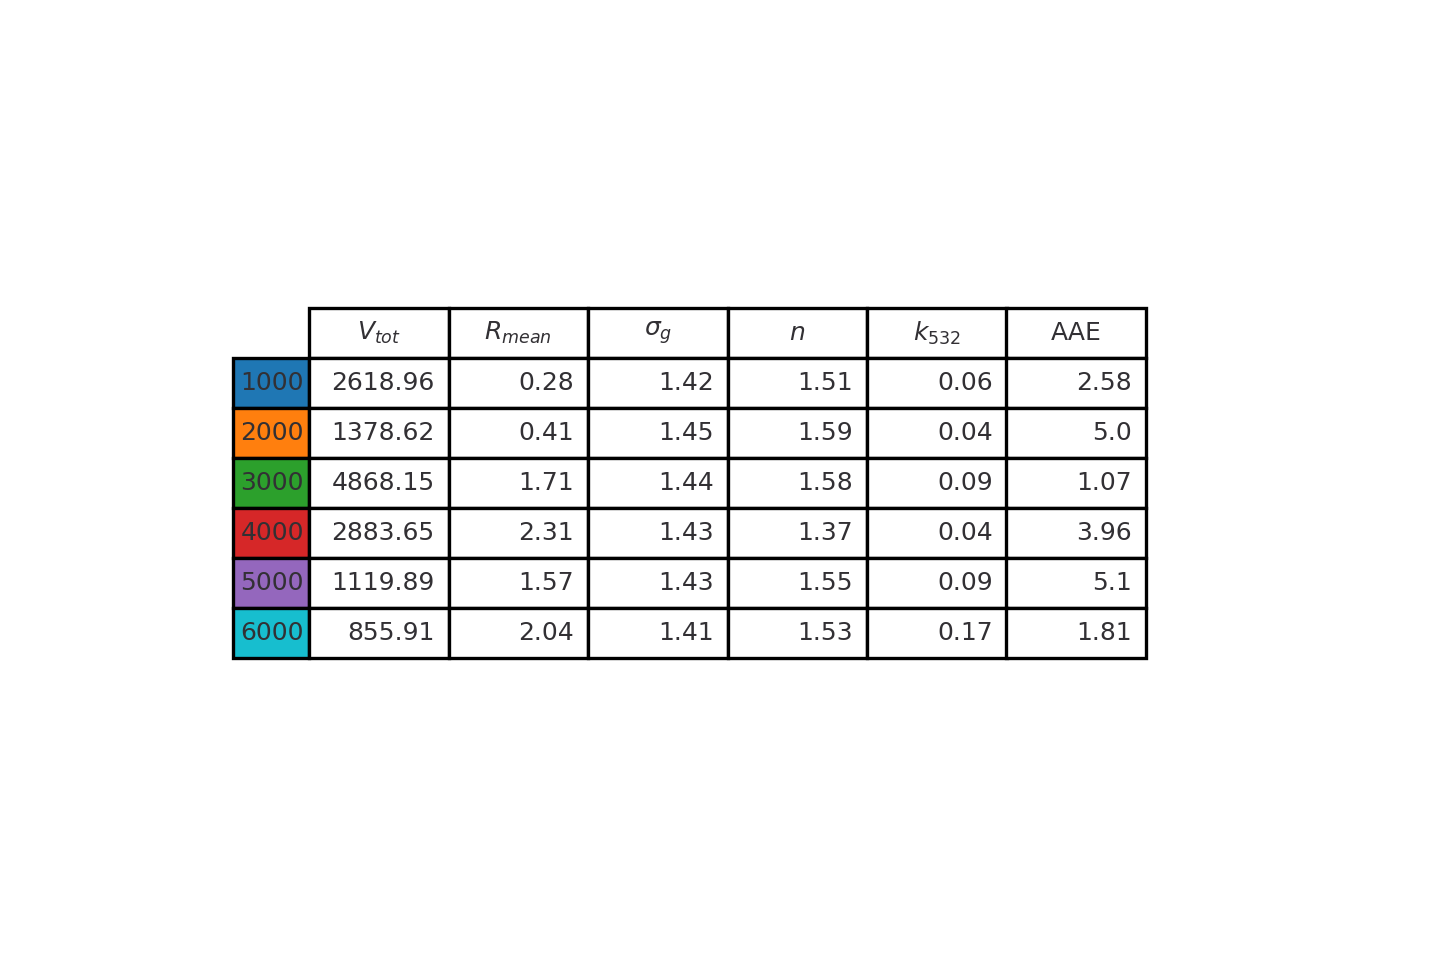

In [23]:

fig, ax =plt.subplots(1,1)



ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_new[dvar_columns].values,colLabels=df_new_columns,rowLabels=df_new_index,loc="center",rowColours =color1,colWidths=[0.1,0.1,0.1,0.1,0.1,0.1])

#plt.show()